## 1. Import data and libraries

In [1]:
# Import Libraries 

import pandas as pd 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy

In [2]:
# Import data

path = r'/Users/berk/Instacart_Grocery_Basket_Analysis'

In [3]:
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02_Data','Prepared_Data', 'orders_products_merged_updated_2.pkl'))

## 2. Creating Bar Charts

<AxesSubplot:>

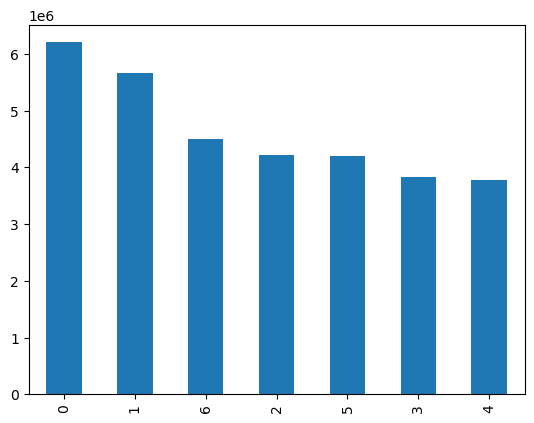

In [5]:
# Create a bar chart

df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar()

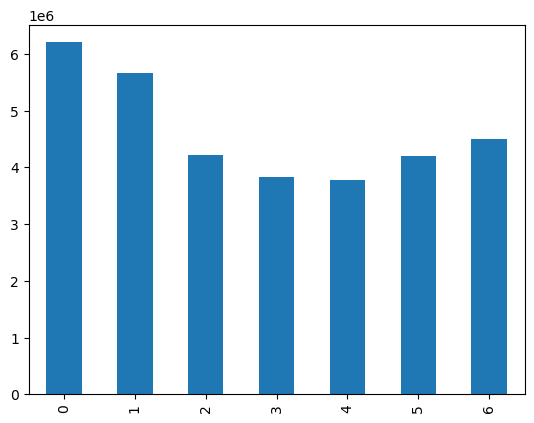

In [6]:
# Additional function sort_index():

bar = df_ords_prods_merged['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Printing frequency

df_ords_prods_merged['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [8]:
# Printing frequency

df_ords_prods_merged['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

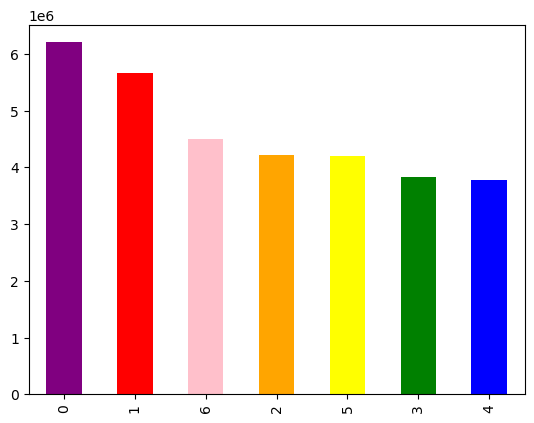

In [9]:
# adding a color

bar = df_ords_prods_merged['orders_day_of_week'].value_counts().plot.bar(color=['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

## 3. Exporting Charts

In [10]:
# Export it outside of Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'bar_orders_dow.png'))

## 4. Creating Histograms and Scatterplots

<AxesSubplot:ylabel='Frequency'>

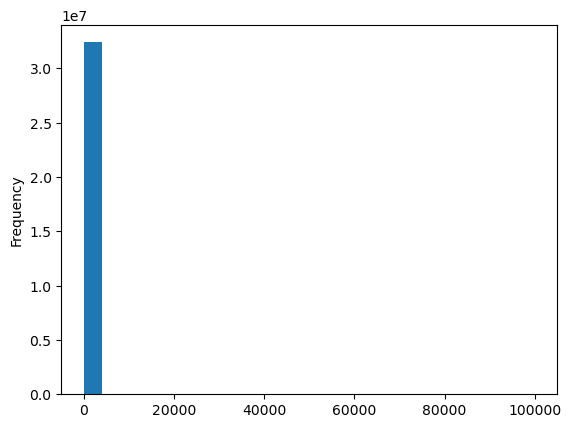

In [11]:
# Create a histogram of the “prices” column

df_ords_prods_merged['prices'].plot.hist(bins = 25)

### Explanation of this histogram

In [12]:
df_ords_prods_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [13]:
df_ords_prods_merged['prices'].mean()

11.980225638467232

In [14]:
df_ords_prods_merged['prices'].median()

7.4

In [15]:
df_ords_prods_merged['prices'].max()

99999.0

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram—having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

<AxesSubplot:xlabel='prices', ylabel='prices'>

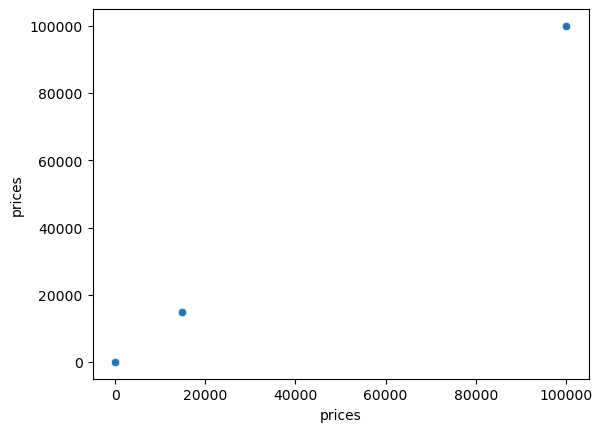

In [16]:
# Create a scatterplot of the “prices” column 
# which is included in the seaborn library (imported into your notebook as sns)

sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_merged)

### Explanation of this scatterplot

In [17]:
# Let’s first determine whether there are any values above a certain threshold in your data

df_ords_prods_merged.loc[df_ords_prods_merged['prices'] > 100]

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_prior_orders,order_frequency_flag
10030345,912404,17,prior,12,2,14,5.0,21553,5,0,...,High-range product,Regularly busy,Regularly days,Most orders,40,Regular customer,14900.0,High spender,5.0,Frequent customer
10030346,603376,17,prior,22,6,16,4.0,21553,3,1,...,High-range product,Regularly busy,Regularly days,Average orders,40,Regular customer,14900.0,High spender,5.0,Frequent customer
10030347,3264360,135,prior,2,2,21,13.0,21553,6,0,...,High-range product,Regularly busy,Regularly days,Average orders,4,New customer,14900.0,High spender,12.0,Regular customer
10030348,892534,135,prior,3,0,8,12.0,21553,3,1,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,14900.0,High spender,12.0,Regular customer
10030349,229704,342,prior,8,1,19,30.0,21553,9,0,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,14900.0,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,prior,29,0,8,4.0,33664,1,0,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,99999.0,High spender,4.0,Frequent customer
29166210,2363282,204099,prior,31,0,9,2.0,33664,1,1,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,99999.0,High spender,4.0,Frequent customer
29166211,3181945,204395,prior,13,3,15,8.0,33664,25,0,...,High-range product,Regularly busy,Slowest days,Most orders,15,Regular customer,99999.0,High spender,5.0,Frequent customer
29166212,2486215,205227,prior,7,3,20,4.0,33664,8,0,...,High-range product,Regularly busy,Slowest days,Average orders,12,Regular customer,99999.0,High spender,12.0,Regular customer


From the output, you can see that there are 5,127 rows with outlier observations (prices greater than $100). In addition, at the top of the “prices” column, you can see that there’s another odd value, $14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the $99,999.00 you identified previously. As such, you can assume that it’s the $14,900.00 and $99,999.00 values that are skewing your charts.



In [18]:
# You’ve replaced all your outliers with missing values, your max value is a much more realistic price point of 25.

df_ords_prods_merged.loc[df_ords_prods_merged['prices'] >100, 'prices'] = np.nan

In [19]:
# max-value check on your “prices” column

df_ords_prods_merged['prices'].max()

25.0

Perfect. Logically, you know that a $25 grocery  item  is  much  more  likely  than a $14,900 item (and especially a $99,999 item!).

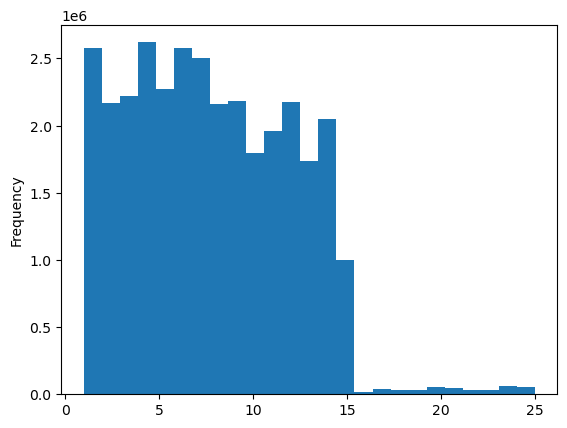

In [22]:
# After you’ve finished up with your ad-hoc data cleaning, let’s retry that histogram of your “prices” column:

hist = df_ords_prods_merged['prices'].plot.hist(bins = 25)

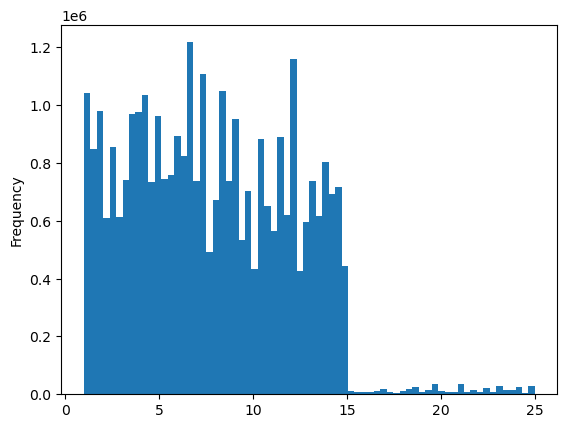

In [23]:
# To increase the level of granularity in the histogram, simply increase the number of bins to, say, 70. 
# This will result in a histogram with more, thinner columns:

hist_2 = df_ords_prods_merged['prices'].plot.hist(bins = 70)

In [24]:
# Export it outside of Jupyter in the form of an image file

hist_2.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'hist_prices.png'))

## 5. Creating Line Charts

In [25]:
df = df_ords_prods_merged[:2000000]

In [26]:
df

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_prior_orders,order_frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range product,Regularly busy,Regularly days,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Average orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range product,Least busy,Slowest days,Most orders,10,New customer,14.0,High spender,20.5,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999995,183520,205921,prior,2,1,9,30.0,24852,9,0,...,Mid-range product,Regularly busy,Busiest days,Average orders,7,New customer,14.8,High spender,30.0,Non-frequent customer
1999996,3315075,205923,prior,1,3,17,NaN,24852,1,0,...,Mid-range product,Regularly busy,Slowest days,Average orders,11,Regular customer,17.3,High spender,14.0,Regular customer
1999997,2672941,205928,prior,1,6,13,NaN,24852,1,0,...,Mid-range product,Regularly busy,Regularly days,Most orders,3,New customer,15.0,High spender,18.0,Regular customer
1999998,3235789,205928,prior,2,3,15,18.0,24852,1,1,...,Mid-range product,Regularly busy,Slowest days,Most orders,3,New customer,15.0,High spender,18.0,Regular customer


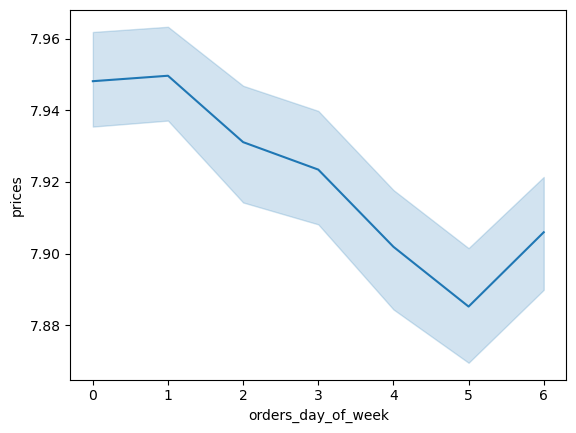

In [27]:
line = sns.lineplot(data = df, x = 'orders_day_of_week', y = 'prices')

## 6. Sampling Data

Creating these samples requires a list of random floating numbers between 0 and 1 (with 1 representing 100 percent of the dataframe) that’s as long as the length of the dataframe. Each row in the dataframe is “assigned” one of these numbers, and then the numbers are compared to a value.

In this case, the value is 0.7, since you want a 70/30 split. Any rows whose assigned number is less than 0.7 are placed in one sample, while any rows whose assigned number is greater than 0.7 are placed in the other, effectively splitting the dataframe into two dataframes at a 70/30 ratio.

In [28]:
np.random.seed(4)

In the first line of the command, you set the “seed.” This “seed” represents a random but reproducible pattern—Python will always give you the same set of random numbers (in this case, seed “4”) rather than creating a new pattern of numbers every time you run the command. You don’t want that as your example needs to be reproducible by you and other analysts.

WHAT’S IN A SEED?
The value you put inside the seed doesn’t actually matter in the grand scheme of things. Whether you use 1, 52, 179, or 4, all you’re doing is ensuring that the random distribution you’re creating is reproducible. 

In [29]:
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

you create a new list called dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7:

In [30]:
dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

array([False,  True, False, ...,  True,  True,  True])

In [31]:
# you’ll receive an output of 32,404,859, which is how many rows are in your dataframe

len(df_ords_prods_merged)

32404859

In [32]:
# function produces a list of random numbers between 0 and 1.

np.random.rand(10)

array([0.93546686, 0.06557465, 0.85698584, 0.24456371, 0.22683171,
       0.17068366, 0.27008946, 0.52534234, 0.83151571, 0.78153402])

Let’s take a look at what the entire workflow would look like in Jupyter:

In [33]:
# Create a List holding True/False values to the test np.random.rant () <= 0.7

dev = np.random.rand(len(df_ords_prods_merged)) <= 0.7

In [34]:
# Store 70% of the sample in the dataframe big

big = df_ords_prods_merged[dev]

In [35]:
# Store 30% of the sample in the dataframe small

small = df_ords_prods_merged[~dev]

In [36]:
len(df_ords_prods_merged)

32404859

In [37]:
len(big) + len (small)

32404859

In [38]:
df_2 = small[['orders_day_of_week','prices']]

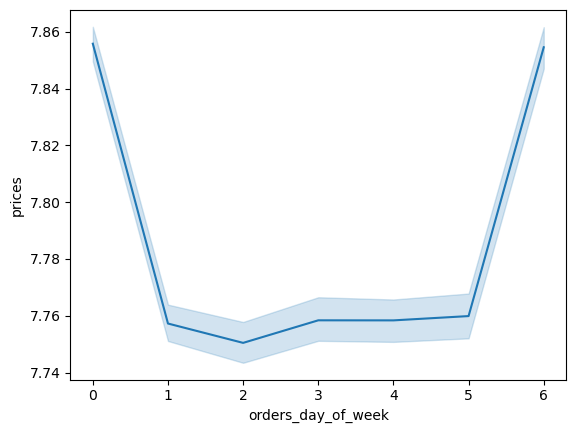

In [39]:
# Create your line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

You should see your days of the week on the bottom and a range of product prices on the left. The blue line, then, represents how prices differ depending on the day of the week. The peaks on days zero and five mean that most money is spent on Saturday and Sunday. This makes sense as people usually stock up on things over the weekend.

You may be wondering what those translucent blue bands are around your line. Those are called error bands, and they represent the chart’s confidence intervals. In other words, if this line were a prediction, there would be a 95 percent probability that the predicted value would fall within the area of the error bands.

In [41]:
df_4 = df_ords_prods_merged[['orders_day_of_week', 'prices']]

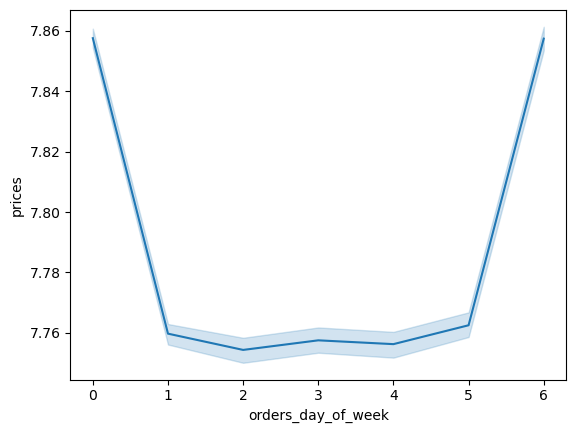

In [42]:
line_2 = sns.lineplot(data = df_4, x = 'orders_day_of_week', y = 'prices')

You’ve now created a line plot from a representative sample of your dataframe in order to avoid potential memory errors

Thankfully, the shape of the line chart for the entire dataframe looks very similar to the shape of the line chart for your subset. That means your subset is an accurate representation of the entire dataframe. Congrats!

In [43]:
# Export it outside of Jupyter in the form of an image file

line.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_prices_and_ords_dow.png'))

In [44]:
line_2.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'line_2_prices_and_ords_dow.png'))